In [ ]:
# !pip install pandas numpy 
# !pip install seaborn
# !pip install scikit-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./accident dataset/train.csv')
df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [4]:
df.shape

(517754, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [6]:
df.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849975,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [7]:
df.isna().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

# Exploratory Data Analysis (EDA) of Train Dataset

* Categorical

In [21]:
def plot_categorical_column(column_name):
    # plt.figure(figsize=(10,6))
    ax = sns.countplot(data=df, x=column_name,hue=column_name ,order=df[column_name].value_counts().index)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, xytext=(0, 3), textcoords='offset points')
    plt.tight_layout()
    # plt.show()

In [22]:
df_categorical = df.select_dtypes(include=['object'])
cat_columns = df_categorical.columns.tolist()
cat_columns

['road_type', 'lighting', 'weather', 'time_of_day']

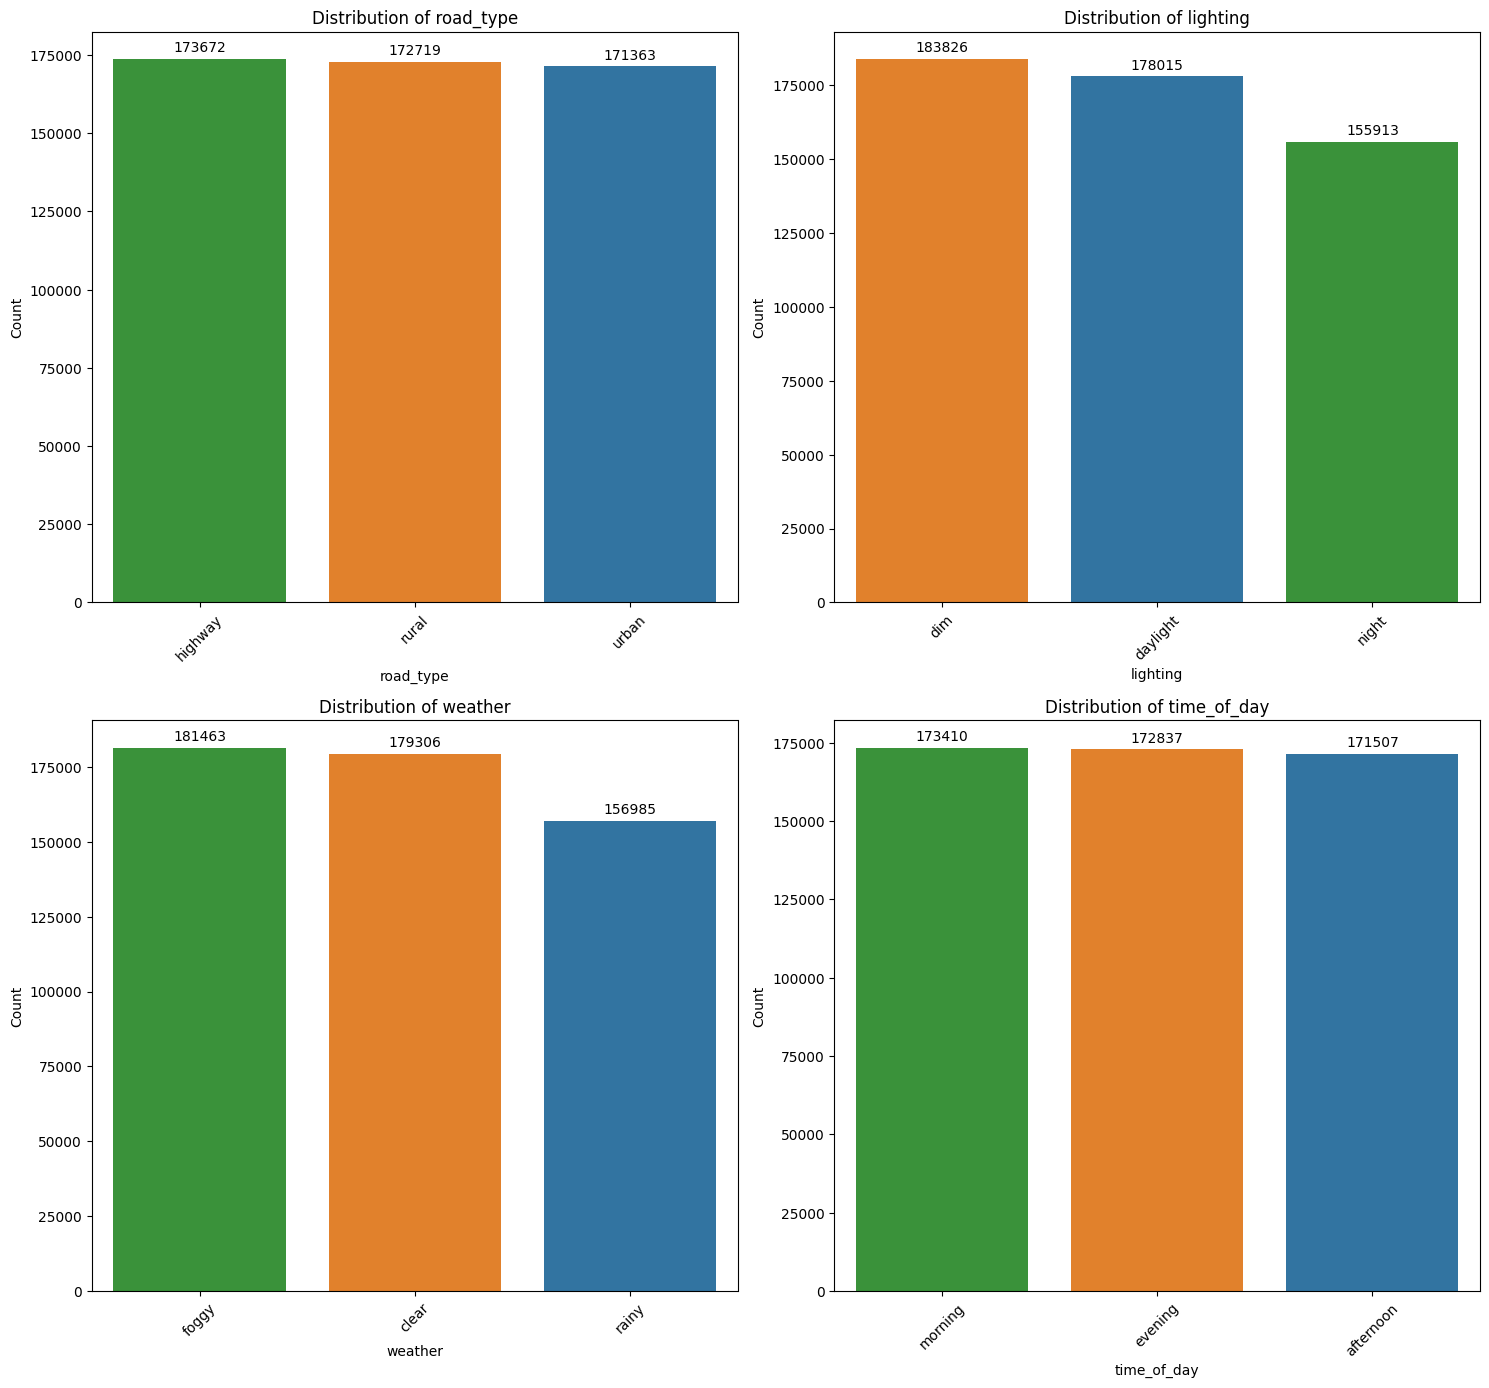

In [23]:
def plot_cat_(df , cat_col_list):
    n = len(cat_col_list)
    plt.figure(figsize=(15,20))
    for i, column_name in enumerate(cat_col_list):
        plt.subplot(int(n/2)+1, 2, i + 1)
        plot_categorical_column(column_name)
    plt.show()

plot_cat_(df, cat_columns)


* Numerical

In [28]:
df_num = df.select_dtypes(exclude=['object'])
num_columns = df_num.columns.tolist()
num_columns

['id',
 'num_lanes',
 'curvature',
 'speed_limit',
 'road_signs_present',
 'public_road',
 'holiday',
 'school_season',
 'num_reported_accidents',
 'accident_risk']

In [34]:
def plot_num_columns(column,name):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(data=df, x=column,bins = 30,kde = True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

    plt.subplot(1,2,2)
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

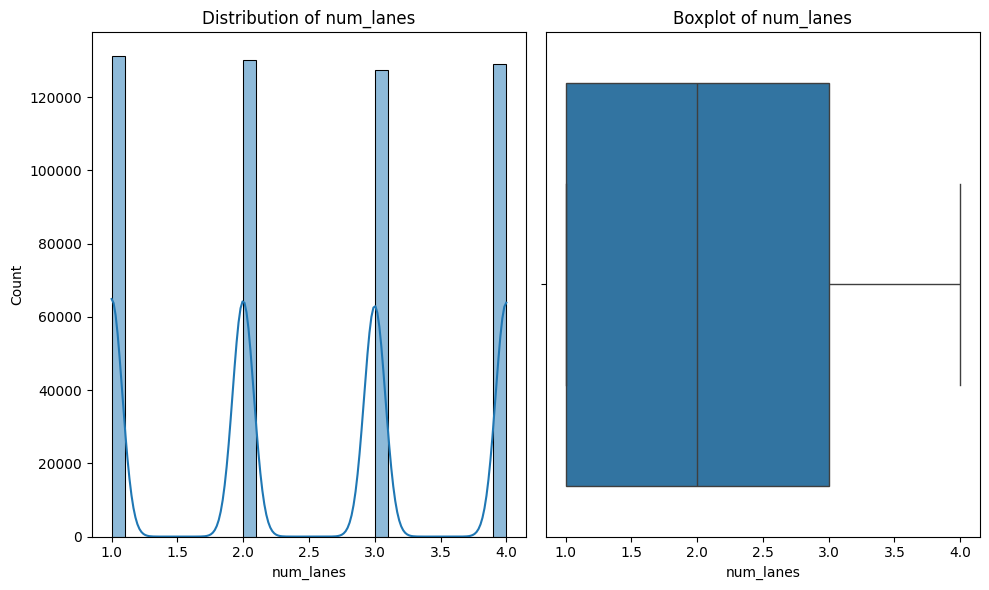

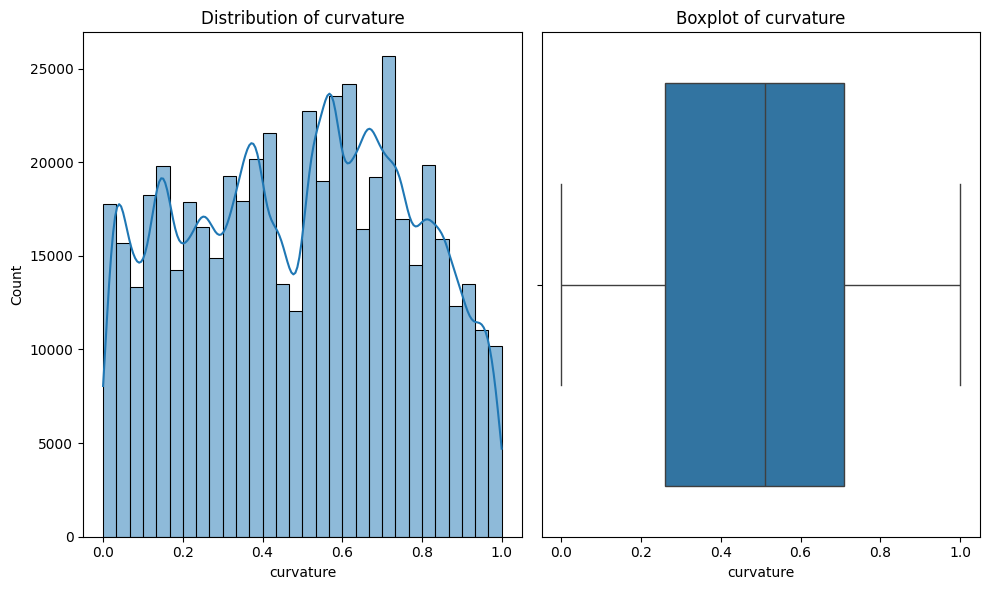

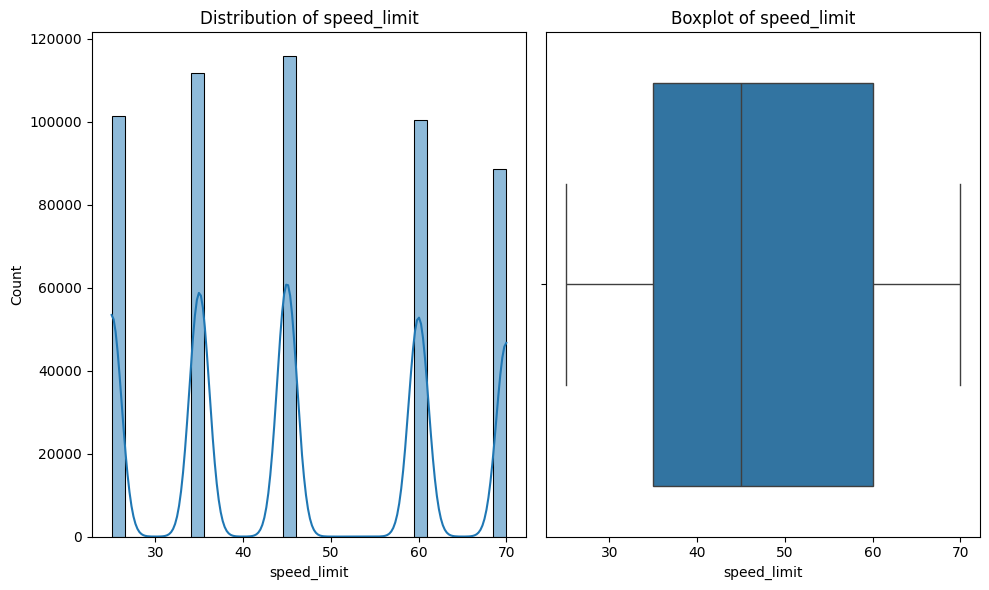

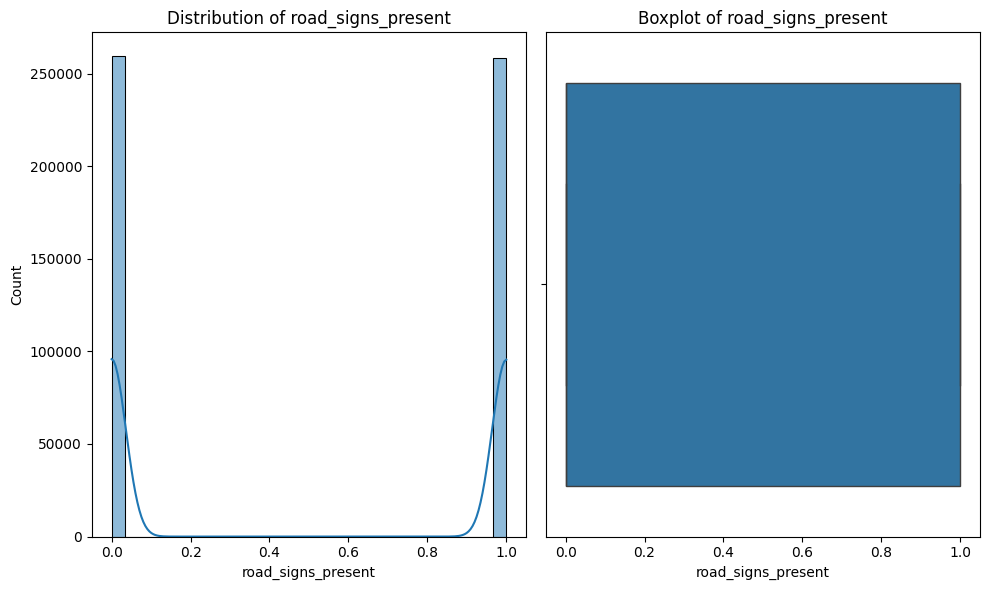

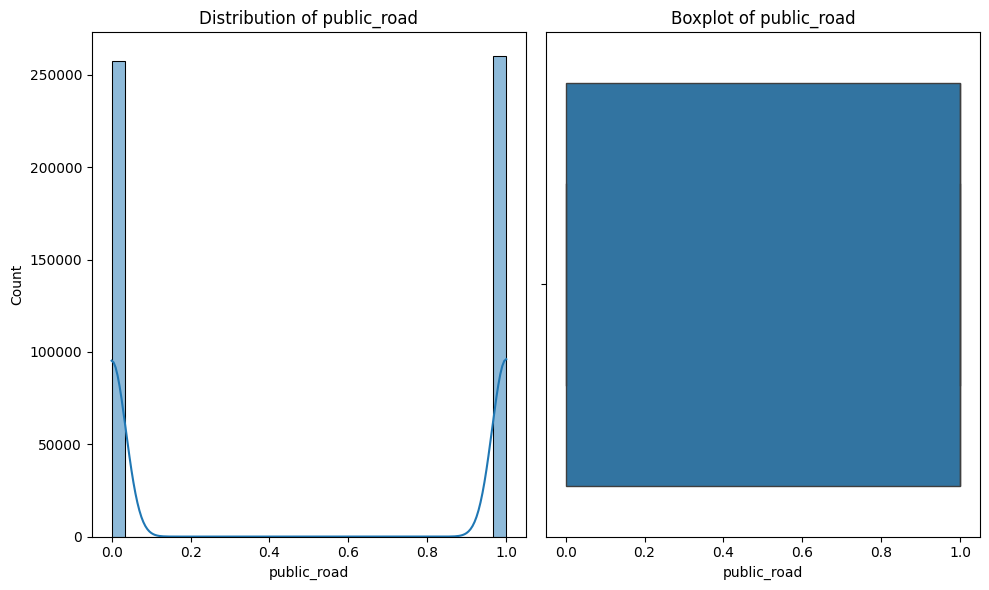

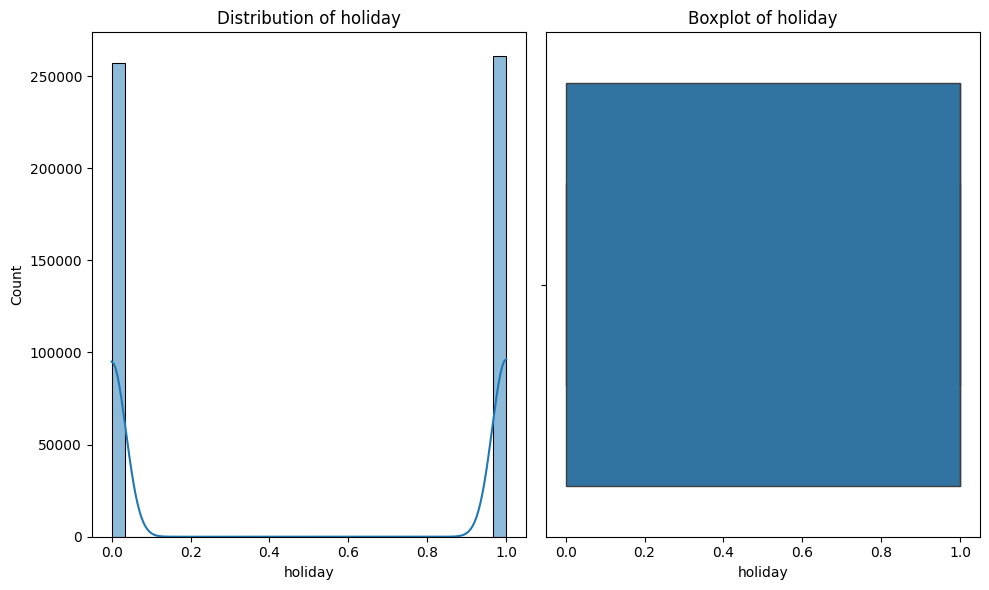

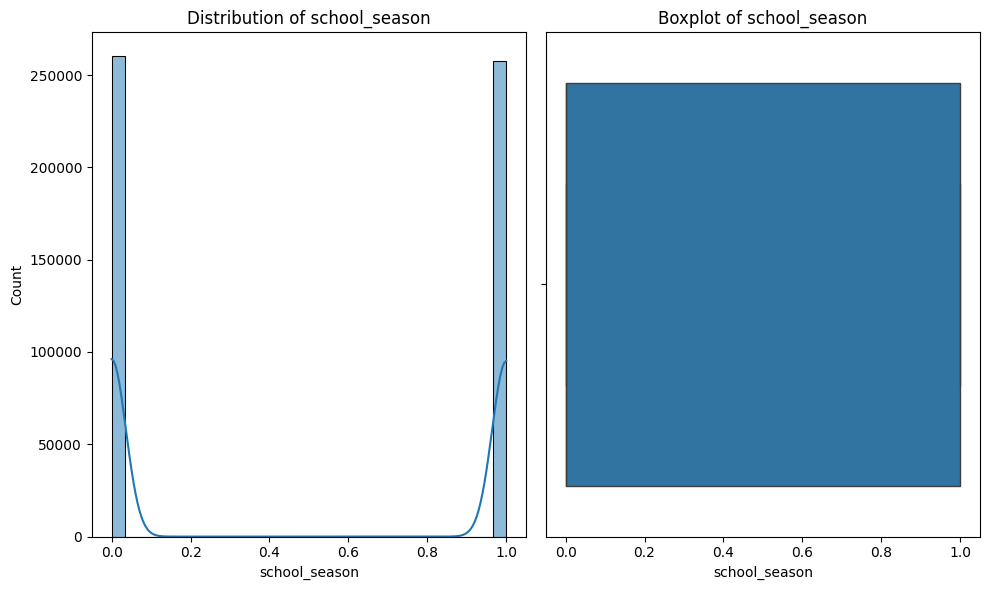

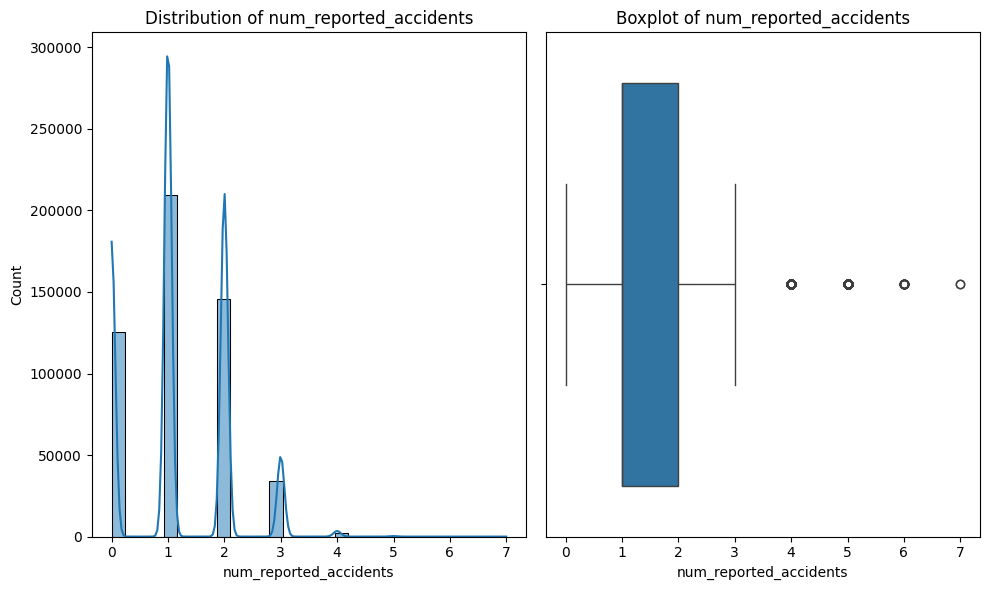

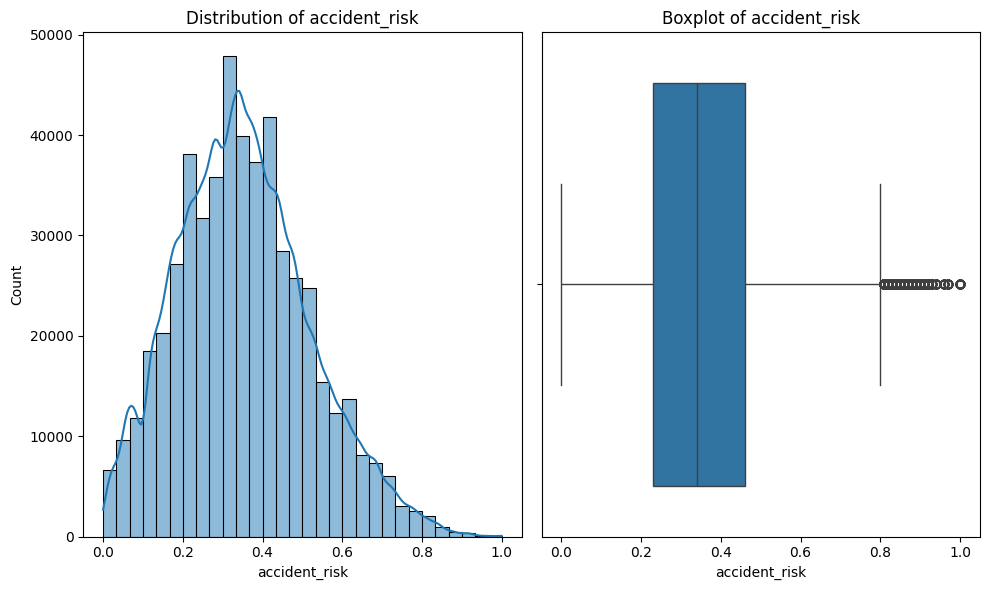

In [36]:
for i , column_name in enumerate(num_columns):
    if i ==0:
        continue
    plot_num_columns(column_name , i)

# Linear Regression model

In [92]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

In [70]:
encoder = OneHotEncoder(drop="first",sparse_output=True)
X_sparce = encoder.fit_transform(df_categorical)
cat_feature_names = encoder.get_feature_names_out(df_categorical.columns)
X_sparce_df = pd.DataFrame(X_sparce.toarray(), columns=cat_feature_names)
X_sparce_df.head()


,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [137]:
X_combined = pd.concat([df_num.iloc[:,1:-1], X_sparce_df], axis=1)
Y = df_num.iloc[:,-1]

In [138]:
X_combined.head()

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
0,2,0.06,35,False,True,False,True,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4,0.99,35,True,False,True,True,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4,0.63,70,False,True,True,False,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,0.07,35,True,True,False,False,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1,0.58,60,False,False,True,False,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [128]:
X_train , X_test, y_train , y_test = train_test_split(X_combined , Y , test_size=0.2 , random_state=42)
X_train.shape , X_test.shape , y.shape , y_test.shape

((414203, 15), (103551, 15), (414203,), (103551,))

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [130]:
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [131]:
# Random Forest model
rf_model = RandomForestRegressor(n_estimators=30, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,30
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [132]:
lr_model.coef_

array([ 9.15313955e-04,  3.32694225e-01,  5.13530197e-03, -1.39430655e-03,
       -1.12729667e-03, -1.15316837e-03,  4.60491073e-04, -8.46487897e-04,
       -3.57329274e-05, -3.91682967e-04,  1.88785904e-01,  9.27172513e-02,
        9.50377377e-02,  7.82748930e-04, -1.18052212e-03])

In [133]:
y_pred = lr_model.predict(X_test)

In [134]:
y_pref_rf = rf_model.predict(X_test)

In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.05912245261375371
Mean Squared Error: 0.0055999691929042965
R^2 Score: 0.7971921702688619


In [136]:
mae_rf = mean_absolute_error(y_test, y_pref_rf)
mse_rf = mean_squared_error(y_test, y_pref_rf)
r2_rf = r2_score(y_test, y_pref_rf)
print(f'Random Forest - Mean Absolute Error: {mae_rf}')
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R^2 Score: {r2_rf}')

Random Forest - Mean Absolute Error: 0.051989771771261566
Random Forest - Mean Squared Error: 0.004515867894639405
Random Forest - R^2 Score: 0.836453856170349


* test data loading

In [77]:
df_test = pd.read_csv('./accident dataset/test.csv')
df_test.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [81]:
df_test = df.iloc[:,1:]
df_test.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [83]:
df_test_cat = df_test.select_dtypes(include=["object"])
df_test_cat.head()

,road_type,lighting,weather,time_of_day
0,urban,daylight,rainy,afternoon
1,urban,daylight,clear,evening
2,rural,dim,clear,morning
3,highway,dim,rainy,morning
4,rural,daylight,foggy,evening


In [84]:
df_test_num = df_test.select_dtypes(exclude=["object"])
df_test_num.head()

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk
0,2,0.06,35,False,True,False,True,1,0.13
1,4,0.99,35,True,False,True,True,0,0.35
2,4,0.63,70,False,True,True,False,2,0.30
3,4,0.07,35,True,True,False,False,1,0.21
4,1,0.58,60,False,False,True,False,1,0.56


In [89]:
X_sparce_test = encoder.fit_transform(df_test_cat)
X_sparce_column_names = encoder.get_feature_names_out(df_test_cat.columns)
X_sparce_test_df = pd.DataFrame(X_sparce_test.toarray(), columns=X_sparce_column_names)
X_sparce_test_df.shape

(517754, 8)

In [90]:
X_test_combined = pd.concat([df_test_num, X_sparce_test_df], axis=1)
X_test_combined.head()

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
0,2,0.06,35,False,True,False,True,1,0.13,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4,0.99,35,True,False,True,True,0,0.35,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4,0.63,70,False,True,True,False,2,0.30,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,0.07,35,True,True,False,False,1,0.21,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1,0.58,60,False,False,True,False,1,0.56,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [91]:
X_test_combined.shape

(517754, 17)

In [ ]:
# y_pred = 